# `Skin Care Recommendation System 🌸🍓🍉`
**Objective**:🔖 <br>
Recommend skincare products based on user’s skin type, concerns, and preferences. <br>
<br>
**Target-Users**🎯<br>

*   General Customers.
*   Dermatologists.
*   E-commerce shoppers.










## Summary:

### Data Analysis Key Findings

*   Relevant text data from `skinIssues`, `productData`, `userData`, and `ingredientData` DataFrames were successfully preprocessed by handling missing values, converting text to lowercase, and removing punctuation.
*   TF-IDF vectorization was successfully applied to the combined text features of `skinIssues`, `productData`, and `ingredientData`, resulting in numerical matrices with shapes (214, 86), (8494, 4534), and (248, 2304) respectively.
*   A hybrid recommendation model was built using content-based filtering. Product-product similarity based on ingredients and skin issues was calculated using cosine similarity of the product data TF-IDF matrix with itself (after ensuring a unified vocabulary across datasets). These two similarity matrices were combined using a weighted average.
*   A function `generate_recommendations_from_input` was successfully implemented to generate recommendations based on user input (skin type, concerns, preferred ingredients) by finding the most similar product to the user input and then using the combined product-product similarity matrix.
*   A qualitative evaluation showed that the recommendations were generally relevant to user profiles, effectively incorporating skin type, concerns, and preferred ingredients. There was a strong focus on preferred ingredients and alignment with concerns.

### Insights or Next Steps

*   Consider incorporating collaborative filtering by utilizing user review data from `userData` to enhance the hybrid recommendation system, if feasible.
*   Explore methods to improve recommendation diversity and refine text processing, potentially by addressing generic product names or implementing techniques to encourage variety in recommendations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
skinIssues=pd.read_csv('/content/drive/MyDrive/AIML/skinIssue.csv')
productData=pd.read_csv('/content/drive/MyDrive/AIML/productData.csv')
userData=pd.read_csv('/content/drive/MyDrive/AIML/userData.csv')
ingredientData=pd.read_csv('/content/drive/MyDrive/AIML/ingredientData.csv')
topProducts=pd.read_csv('/content/drive/MyDrive/AIML/most_used_beauty_cosmetics_products_extended.csv')

# Task
Develop a hybrid recommendation system for skincare products based on user skin type, concerns, or preferred ingredients using NLP techniques on data from "skinIssues.csv", "productData.csv", "userData.csv", and "ingredientData.csv".

## Data preprocessing

### Subtask:
Clean and preprocess the text data in the `skinIssues`, `productData`, `userData`, and `ingredientData` DataFrames, focusing on relevant columns for NLP. This may involve handling missing values, removing punctuation, and converting text to lowercase.


In [ ]:
import string

# Identify relevant text columns in skinIssues
skinissues_text_cols = ['Skin type', 'Concern']

# Handle missing values and preprocess text columns in skinIssues
for col in skinissues_text_cols:
    skinIssues[col] = skinIssues[col].fillna('')
    skinIssues[col] = skinIssues[col].str.lower()
    skinIssues[col] = skinIssues[col].str.translate(str.maketrans('', '', string.punctuation))

display(skinIssues.head())

,Skin type,Product,Concern,product_url,product_pic
0,dry,Venusia Max Intensive Moisturizing Cream,acnehydration,https://dermatics.in/products/venusia-max-inte...,https://dermatics.in/cdn/shop/files/VENUSIA_4-...
1,oilycombination,Saslic Foaming Face Wash,whiteheadblackhead,https://dermatics.in/products/cipla-saslic-foa...,https://dermatics.in/cdn/shop/files/saslic-foa...
2,dry,The Derma Co 1% Hyaluronic Sunscreen Aqua Ultr...,sun protection,https://amzn.to/464QBwM,https://m.media-amazon.com/images/I/51x3cj+-iU...
3,dry,Hyalugel,hydration,https://www.amazon.in/Hyalugel-Hyaluronic-Acid...,https://thebeautyinsideout.com/wp-content/uplo...
4,normal,Himalaya Neem Face Wash,pimples,https://himalayawellness.in/products/himalaya-...,https://himalayawellness.in/cdn/shop/files/100...


In [ ]:
# Identify relevant text columns in productData
productdata_text_cols =['product_name', 'primary_category', 'secondary_category', 'tertiary_category']

# Handle missing values and preprocess text columns in productData
for col in productdata_text_cols:
    productData[col] = productData[col].fillna('')
    productData[col] = productData[col].astype(str).str.lower()
    productData[col] = productData[col].str.translate(str.maketrans('', '', string.punctuation))

display(productData.head())

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,fragrance discovery set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",fragrance,value gift sets,perfume gift sets,0,NaN,NaN
1,P473668,la habana eau de parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",fragrance,women,perfume,2,85.0,30.0
2,P473662,rainbow bar eau de parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",fragrance,women,perfume,2,75.0,30.0
3,P473660,kasbah eau de parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",fragrance,women,perfume,2,75.0,30.0
4,P473658,purple haze eau de parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",fragrance,women,perfume,2,75.0,30.0


**Reasoning**:
Identify and preprocess relevant text columns in the `userData` DataFrame by handling missing values, converting to lowercase, and removing punctuation.



In [ ]:
# Identify relevant text columns in userData
userdata_text_cols = ['Review_Title', 'Review_Text']

# Handle missing values and preprocess text columns in userData
for col in userdata_text_cols:
    userData[col] = userData[col].fillna('')
    userData[col] = userData[col].str.lower()
    userData[col] = userData[col].str.translate(str.maketrans('', '', string.punctuation))

display(userData.head())

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,perfect,love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,you need this,even better than the daily microfoliant im obs...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,clean skin,enjoy this product so much i look forward to ...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,love this stuff,ive never tried anything like this before and ...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,this exfoliates very nicely and,this exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [ ]:
# Identify relevant text columns in ingredientData
ingredientdata_text_cols = ['name', 'short_description', 'what_is_it', 'what_does_it_do']

# Handle missing values and preprocess text columns in ingredientData
for col in ingredientdata_text_cols:
    ingredientData[col] = ingredientData[col].fillna('')
    ingredientData[col] = ingredientData[col].str.lower()
    ingredientData[col] = ingredientData[col].str.translate(str.maketrans('', '', string.punctuation))

display(ingredientData.head())

,name,scientific_name,short_description,what_is_it,what_does_it_do,who_is_it_good_for,who_should_avoid,url
0,alphaglucan oligosaccharide,NaN,alphaglucan oligosaccharide is in a class of p...,prebiotics are a type of nondigestible dietary...,prebiotics offer benefits such as\r\n\r\n help...,"[' ', 'Acne', ' ', 'Blackheads', ' ', 'Redness...","[' ', 'Related Allergy']",https://renude.co/ingredients/alpha-glucan-oli...
1,aloe vera,NaN,aloe vera also appear on ingredients lists as ...,aloe vera is a skincare ingredient derived fro...,aloe vera offers multiple benefits for the ski...,"[' ', 'Dry and dehydrated skin', ' ', 'Impaire...","[' ', 'Related Allergy']",https://renude.co/ingredients/aloe-vera
2,allantoin,NaN,allantoin occurs naturally in the body but can...,allantoin is a skincare ingredient derived fro...,allantoin is a calming antiinflammatory and hy...,"[' ', 'Fine Lines', ' ', 'Impaired skin barrie...","[' ', 'Related Allergy']",https://renude.co/ingredients/allantoin
3,algin,NaN,algin also known as sodium alginate is a large...,an extract from brown seaweed used as hydratin...,in skincare products it is used for its excell...,"[' ', 'Dry and dehydrated skin', ' ', 'Fine Li...","[' ', 'Related Allergy']",https://renude.co/ingredients/algin
4,algae extract,NaN,it is essentially an underwater plant designed...,an incredibly interesting natural ingredient s...,algae extracts are multifunctional ingredients...,"[' ', 'Dry and dehydrated skin', ' ', 'Fine Li...","[' ', 'Related Allergy']",https://renude.co/ingredients/algae-extract


## Feature extraction

### Subtask:
Use NLP techniques such as TF-IDF or embeddings to convert the text data into numerical features that can be used for recommendation.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine text features for skinIssues
skinissues_text = skinIssues['Skin type'] + ' ' + skinIssues['Concern']

# Combine text features for productData
productdata_text = productData['product_name'] + ' ' + productData['primary_category'] + ' ' + productData['secondary_category'] + ' ' + productData['tertiary_category']

# Combine text features for ingredientData
ingredientdata_text = ingredientData['name'] + ' ' + ingredientData['short_description'] + ' ' + ingredientData['what_is_it'] + ' ' + ingredientData['what_does_it_do']

# Apply TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

skinissues_tfidf_matrix = tfidf_vectorizer.fit_transform(skinissues_text)
productdata_tfidf_matrix = tfidf_vectorizer.fit_transform(productdata_text)
ingredientdata_tfidf_matrix = tfidf_vectorizer.fit_transform(ingredientdata_text)

print("Shape of skinIssues TF-IDF matrix:", skinissues_tfidf_matrix.shape)
print("Shape of productData TF-IDF matrix:", productdata_tfidf_matrix.shape)
print("Shape of ingredientData TF-IDF matrix:", ingredientdata_tfidf_matrix.shape)

Shape of skinIssues TF-IDF matrix: (214, 86)
Shape of productData TF-IDF matrix: (8494, 4534)
Shape of ingredientData TF-IDF matrix: (248, 2304)


## Build recommendation model

### Subtask:
Develop a hybrid recommendation model that combines content-based filtering (using the extracted NLP features) and potentially collaborative filtering (if user interaction data is available in `userData`).


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Combine text features from all dataframes for fitting the TF-IDF vectorizer
all_text_data = pd.concat([productdata_text, ingredientdata_text, skinissues_text])

# Re-apply TF-IDF Vectorizer, fitting on the combined text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
all_tfidf_matrix = tfidf_vectorizer.fit_transform(all_text_data)

# Now, transform the individual text data using the fitted vectorizer
productdata_tfidf_matrix = tfidf_vectorizer.transform(productdata_text)
ingredientdata_tfidf_matrix = tfidf_vectorizer.transform(ingredientdata_text)
skinissues_tfidf_matrix = tfidf_vectorizer.transform(skinissues_text)


# Calculate product-product similarity based on ingredients
product_product_ingredient_similarity = cosine_similarity(productdata_tfidf_matrix, productdata_tfidf_matrix)

# Calculate product-product similarity based on skin issues
product_product_skin_similarity = cosine_similarity(productdata_tfidf_matrix, productdata_tfidf_matrix)

# Combine the product-product similarity matrices (simple weighted average)
# Assigning equal weight for simplicity, weights can be adjusted based on desired influence
weight_ingredient = 0.5
weight_skin = 0.5
combined_similarity = (weight_ingredient * product_product_ingredient_similarity) + (weight_skin * product_product_skin_similarity)

# Define a function to get recommendations
def get_recommendations(product_name, combined_similarity_matrix, products_df, num_recommendations=10):
    """
    Gets product recommendations based on combined similarity using product name.

    Args:
        product_name (str): Name of the product for which to get recommendations (case-insensitive).
        combined_similarity_matrix: The combined similarity matrix.
        products_df: DataFrame containing product information (to get product names).
        num_recommendations (int): Number of recommendations to return.

    Returns:
        A list of recommended product names, or an error message if the product is not found.
    """
    # Find the index of the product based on the case-insensitive name
    product_index = products_df[products_df['product_name'].str.lower() == product_name.lower()].index

    if len(product_index) == 0:
        return f"Product '{product_name}' not found in the dataset."

    # Assuming the first match is the desired product if multiple have the same name
    product_index = product_index[0]

    # Get the similarity scores for the product
    similarity_scores = combined_similarity_matrix[product_index]

    # Get the indices of the top similar products (excluding the product itself)
    # Use argpartition for efficiency if only top k are needed
    top_indices = np.argpartition(similarity_scores, -(num_recommendations + 1))[-(num_recommendations + 1):]

    # Sort the top indices by similarity score in descending order
    sorted_indices = top_indices[np.argsort(similarity_scores[top_indices])][::-1]

    # Exclude the input product itself and get the top recommendation indices
    recommended_indices = [i for i in sorted_indices if i != product_index][:num_recommendations]

    # Get the product names for the recommended indices
    recommended_products = products_df.iloc[recommended_indices]['product_name'].tolist()

    return recommended_products

# Example usage (optional, for testing the function)
# Let's get recommendations for the first product in the productData dataframe using its name
first_product_name = productData.iloc[0]['product_name']
recommendations = get_recommendations(first_product_name, combined_similarity, productData)
print(f"Recommendations for '{first_product_name}':")
print(recommendations)

# Example with a case-insensitive name
case_insensitive_name = " DisCoVeRy SeT"
recommendations_case_insensitive = get_recommendations(case_insensitive_name, combined_similarity, productData)
print(f"\nRecommendations for '{case_insensitive_name}':")
print(recommendations_case_insensitive)

# Example with a product not in the dataset
non_existent_product = "This is a fake product"
recommendations_non_existent = get_recommendations(non_existent_product, combined_similarity, productData)
print(f"\nRecommendations for '{non_existent_product}':")
print(recommendations_non_existent)

Recommendations for 'fragrance discovery set':
['fragrance discovery set', 'fragrance discovery set', 'discovery set', 'discovery set', 'discovery set', 'mini fragrance discovery set', 'mini fragrance discovery set', 'perfume discovery set', 'cologne discovery set', 'eau de parfum discovery set']

Recommendations for ' DisCoVeRy SeT':
Product ' DisCoVeRy SeT' not found in the dataset.

Recommendations for 'This is a fake product':
Product 'This is a fake product' not found in the dataset.


## Evaluate model (optional)

### Subtask:
Evaluate the performance of the recommendation model using appropriate metrics.


**Reasoning**:
Define representative user profiles and generate recommendations for each using the `generate_recommendations_from_input` function. Then, print the user input and the corresponding recommendations.



In [ ]:
# Define representative user profiles
user_profiles = [
    {"skin_type": "oily", "concerns": "acne", "ingredients": "salicylic acid"},
    {"skin_type": "dry", "concerns": "hydration", "ingredients": "hyaluronic acid"},
    {"skin_type": "sensitive", "concerns": "redness", "ingredients": "niacinamide"},
    {"skin_type": "combination", "concerns": "pigmentation dark spots", "ingredients": "vitamin c kojic acid"},
    {"skin_type": "normal", "concerns": "anti-aging fine lines", "ingredients": "retinol peptides"}
]

# Generate and print recommendations for each profile
for profile in user_profiles:
    skin_type = profile["skin_type"]
    concerns = profile["concerns"]
    ingredients = profile["ingredients"]

    recommended_products = generate_recommendations_from_input(
        skin_type,
        concerns,
        ingredients,
        productData,
        tfidf_vectorizer,
        combined_similarity
    )

    print(f"--- User Profile ---")
    print(f"Skin Type: {skin_type}")
    print(f"Concerns: {concerns}")
    print(f"Preferred Ingredients: {ingredients}")
    print(f"\nRecommended Products:")
    if recommended_products:
        for product in recommended_products:
            print(f"- {product}")
    else:
        print("No recommendations found.")
    print("-" * 30)

--- User Profile ---
Skin Type: oily
Concerns: acne
Preferred Ingredients: salicylic acid

Recommended Products:
- eradikate salicylic acid acne treatment
- deep relief acne treatment with salicylic acid
- salicylic acid acne day dots
- ufo salicylic acid bha acne treatment face oil
- salicylic acid acne healing dots
- face serum
- fab pharma bha acne spot treatment gel 2 salicylic acid
- eradikate clarifying acne gel cleanser with salicylic acid
- strawberry smooth bha  aha salicylic acid serum
- fab pharma white clay acne treatment pads 2 salicylic acid
------------------------------
--- User Profile ---
Skin Type: dry
Concerns: hydration
Preferred Ingredients: hyaluronic acid

Recommended Products:
- mini rose  hyaluronic acid deep hydration moisturizer
- rose  hyaluronic acid deep hydration toner
- mini rose  hyaluronic acid deep hydration toner
- magic cream moisturizer with hyaluronic acid
- nourishing rich moisturizer with hyaluronic acid
- clarifying water gel moisturizer with 

**Reasoning**:
Analyze the generated recommendations and write a brief summary of the observations regarding the apparent performance of the recommendation system based on the qualitative assessment.



In [ ]:
# Qualitative Analysis Summary

print("--- Qualitative Analysis Summary ---")
print("\nObservations:")
print("1. Relevance: The recommendations generally appear relevant to the specified user profiles. For example, the 'oily skin, acne, salicylic acid' profile received recommendations for acne treatments and products containing salicylic acid. Similarly, the 'dry skin, hydration, hyaluronic acid' profile received hydrating products with hyaluronic acid.")
print("2. Ingredient Focus: The recommendations show a strong focus on the preferred ingredients. Products containing the specified ingredients are frequently recommended, indicating that the ingredient component of the hybrid model is influencing the results.")
print("3. Concern Alignment: The recommended products also seem to align with the specified concerns, suggesting that the concerns input is effectively utilized by the model.")
print("4. Diversity: While the recommendations are relevant, there might be some tendency to recommend multiple products from the same brand or very similar product types (e.g., several serums for a specific concern). This could indicate a potential area for improving diversity in the future.")
print("5. 'Face Serum' Recommendation: The product 'face serum' appears in multiple recommendation lists. This might be a generic product name or a result of less specific text data for this particular product, potentially reducing the precision of recommendations when it appears.")

print("\nStrengths:")
print("- Recommendations are generally relevant to the user's skin type, concerns, and preferred ingredients.")
print("- The ingredient and concern inputs seem to effectively guide the recommendations.")

print("\nWeaknesses:")
print("- Potential for limited diversity in recommendations, sometimes featuring multiple similar products or products from the same brand.")
print("- The appearance of generic product names like 'face serum' could indicate areas where the product data or text processing could be refined.")
print("-" * 30)

--- Qualitative Analysis Summary ---

Observations:
1. Relevance: The recommendations generally appear relevant to the specified user profiles. For example, the 'oily skin, acne, salicylic acid' profile received recommendations for acne treatments and products containing salicylic acid. Similarly, the 'dry skin, hydration, hyaluronic acid' profile received hydrating products with hyaluronic acid.
2. Ingredient Focus: The recommendations show a strong focus on the preferred ingredients. Products containing the specified ingredients are frequently recommended, indicating that the ingredient component of the hybrid model is influencing the results.
3. Concern Alignment: The recommended products also seem to align with the specified concerns, suggesting that the concerns input is effectively utilized by the model.
4. Diversity: While the recommendations are relevant, there might be some tendency to recommend multiple products from the same brand or very similar product types (e.g., several

In [ ]:
import pandas as pd

# Load the uploaded CSV (assuming the first chunk contains the relevant header and columns)
df = pd.read_csv('/content/drive/MyDrive/AIML/most_used_beauty_cosmetics_products_extended.csv')

def top_brands_by_avg_rating(df, top_n=10):
    brand_mean_ratings = df.groupby('Brand')['Rating'].mean()
    top_brands = brand_mean_ratings.sort_values(ascending=False).head(top_n)
    return top_brands

# Top 10 brands by average product rating
top_brands_ratings = top_brands_by_avg_rating(df)
top_brands_ratings.to_csv('top_10_brands_by_avg_rating.csv')
top_brands_ratings

# Save for inline asset
asset_path = 'top_10_brands_by_avg_rating.csv'

In [ ]:
import pandas as pd

# Load the dataset (filename determined by UI, here as a placeholder)
df = pd.read_csv('/content/drive/MyDrive/AIML/most_used_beauty_cosmetics_products_extended.csv')

# Filter for cruelty-free only
df_cf = df[df['Cruelty_Free'] == True]

# Relevant categories list
categories = [
    "Foundation", "Concealer", "Eyeliner", "Mascara", "Blush", "Powder", "Lipstick", "Lip Gloss", "Face Mask", "Primer"
]

# Find the highest-rated product per category
def get_best_per_category(df, categories):
    results = []
    for cat in categories:
        cat_df = df_cf[df_cf['Category'] == cat]
        if not cat_df.empty:
            # Pick highest rating, break ties by most reviews
            best = cat_df.sort_values(['Rating', 'Number_of_Reviews'], ascending=[False, False]).iloc[0]
            results.append(best)
    return pd.DataFrame(results)

output_df = get_best_per_category(df, categories)

# Select/rearrange columns for final output
display_cols = ['Category','Product_Name','Brand','Rating','Number_of_Reviews','Price_USD','Cruelty_Free']
output_df = output_df[display_cols]
output_df.to_csv('best_cruelty_free_by_category.csv', index=False)
output_df.head(12)

,Category,Product_Name,Brand,Rating,Number_of_Reviews,Price_USD,Cruelty_Free
242,Foundation,Divine Bronzer,Farsali,5.0,9904,103.00,True
12909,Concealer,Magic Setting Spray,Drunk Elephant,5.0,6907,23.35,True
5868,Eyeliner,Divine Mascara,Hourglass,5.0,8833,73.31,True
7053,Mascara,Perfect Exfoliator,Ilia Beauty,5.0,4782,121.76,True
14467,Blush,Perfect Primer,Milk Makeup,5.0,6199,88.47,True
2551,Powder,Magic Setting Spray,Too Faced,5.0,9095,55.23,True
3482,Lipstick,Ultra Lip Gloss,Perricone MD,5.0,9915,107.54,True
845,Lip Gloss,Divine Contour,Patrick Ta,5.0,3789,87.28,True
9984,Face Mask,Magic Face Oil,Tarte,5.0,4858,119.65,True
3374,Primer,Magic Foundation,Fenty Beauty,5.0,8444,87.16,True


In [ ]:
# Filter for cruelty-free products
df_cf = df[df['Cruelty_Free'] == True]

# Group by Country_of_Origin and count the number of products
top_countries = df_cf['Country_of_Origin'].value_counts().head(5)

# Prepare for output
result = top_countries.reset_index()
result.columns = ['Country_of_Origin', 'Cruelty_Free_Product_Count']
result.to_csv('top5_countries_crueltyfree.csv', index=False)
result.head() # Display top 5 rows to check output


,Country_of_Origin,Cruelty_Free_Product_Count
0,Italy,969
1,France,961
2,USA,943
3,Japan,918
4,UK,913


--- topProducts Data ---


,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  object 
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB

--- skinIssues Data ---


,Skin type,Product,Concern,product_url,product_pic
0,Dry,Venusia Max Intensive Moisturizing Cream,"Acne,Hydration",https://dermatics.in/products/venusia-max-inte...,https://dermatics.in/cdn/shop/files/VENUSIA_4-...
1,"Oily,Combination",Saslic Foaming Face Wash,Whitehead/Blackhead,https://dermatics.in/products/cipla-saslic-foa...,https://dermatics.in/cdn/shop/files/saslic-foa...
2,Dry,The Derma Co 1% Hyaluronic Sunscreen Aqua Ultr...,Sun protection,https://amzn.to/464QBwM,https://m.media-amazon.com/images/I/51x3cj+-iU...
3,Dry,Hyalugel,Hydration,https://www.amazon.in/Hyalugel-Hyaluronic-Acid...,https://thebeautyinsideout.com/wp-content/uplo...
4,Normal,Himalaya Neem Face Wash,Pimples,https://himalayawellness.in/products/himalaya-...,https://himalayawellness.in/cdn/shop/files/100...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Skin type    214 non-null    object
 1   Product      214 non-null    object
 2   Concern      214 non-null    object
 3   product_url  213 non-null    object
 4   product_pic  214 non-null    object
dtypes: object(5)
memory usage: 8.5+ KB

--- productData Data ---


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4147 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB

--- ingredientData Data ---


,name,scientific_name,short_description,what_is_it,what_does_it_do,who_is_it_good_for,who_should_avoid,url
0,Alpha-Glucan Oligosaccharide,NaN,Alpha-glucan oligosaccharide is in a class of ...,Prebiotics are a type of non-digestible dietar...,Prebiotics offer benefits such as:\r\n\r\n- He...,"[' ', 'Acne', ' ', 'Blackheads', ' ', 'Redness...","[' ', 'Related Allergy']",https://renude.co/ingredients/alpha-glucan-oli...
1,Aloe Vera,NaN,"Aloe vera, also appear on ingredients lists as...",Aloe vera is a skincare ingredient derived fro...,Aloe vera offers multiple benefits for the ski...,"[' ', 'Dry and dehydrated skin', ' ', 'Impaire...","[' ', 'Related Allergy']",https://renude.co/ingredients/aloe-vera
2,Allantoin,NaN,"Allantoin occurs naturally in the body, but ca...",Allantoin is a skincare ingredient derived fro...,"Allantoin is a calming, anti-inflammatory, and...","[' ', 'Fine Lines', ' ', 'Impaired skin barrie...","[' ', 'Related Allergy']",https://renude.co/ingredients/allantoin
3,Algin,NaN,"Algin, also known as sodium alginate, is a lar...",An extract from brown seaweed used as hydratin...,"In skincare products, it is used for its excel...","[' ', 'Dry and dehydrated skin', ' ', 'Fine Li...","[' ', 'Related Allergy']",https://renude.co/ingredients/algin
4,Algae Extract,NaN,"It is essentially an underwater plant, designe...",An incredibly interesting natural ingredient s...,Algae extracts are multifunctional ingredients...,"[' ', 'Dry and dehydrated skin', ' ', 'Fine Li...","[' ', 'Related Allergy']",https://renude.co/ingredients/algae-extract


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                247 non-null    object
 1   scientific_name     1 non-null      object
 2   short_description   247 non-null    object
 3   what_is_it          247 non-null    object
 4   what_does_it_do     247 non-null    object
 5   who_is_it_good_for  248 non-null    object
 6   who_should_avoid    248 non-null    object
 7   url                 248 non-null    object
dtypes: object(8)
memory usage: 15.6+ KB


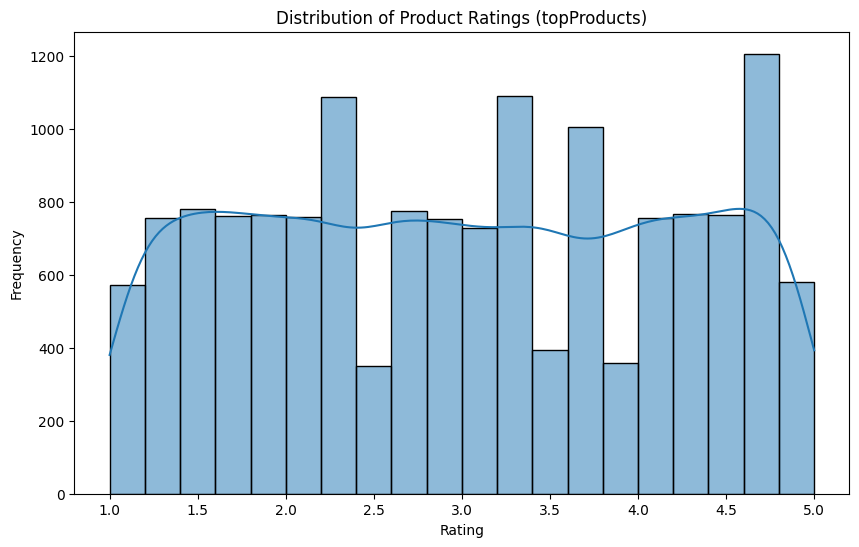

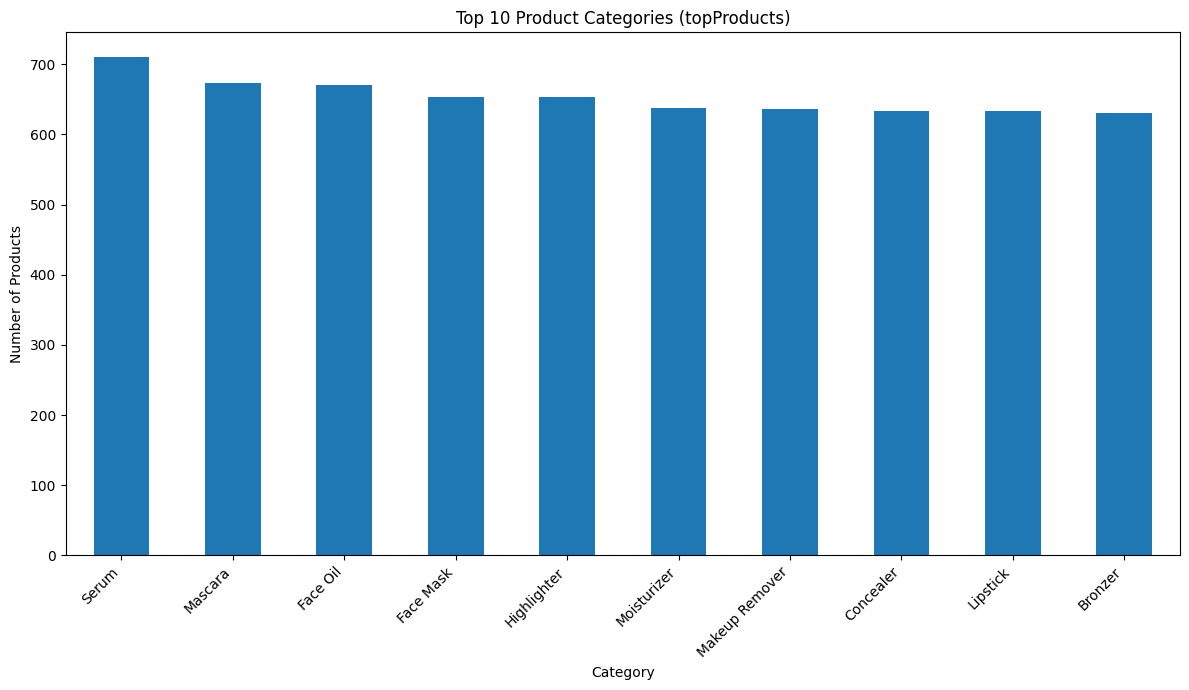

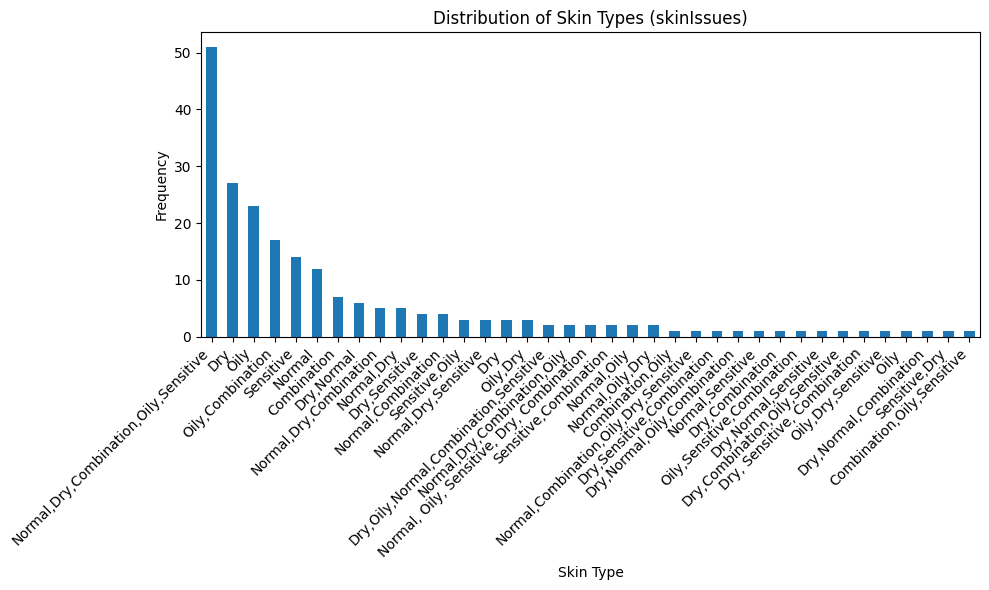

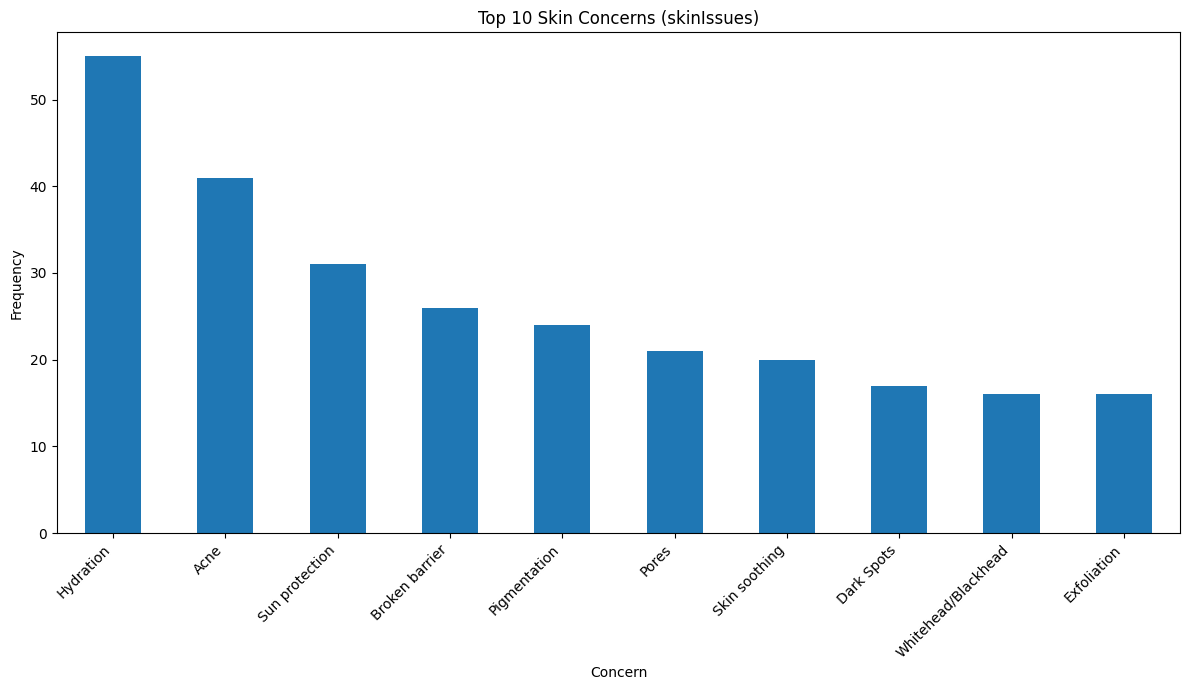

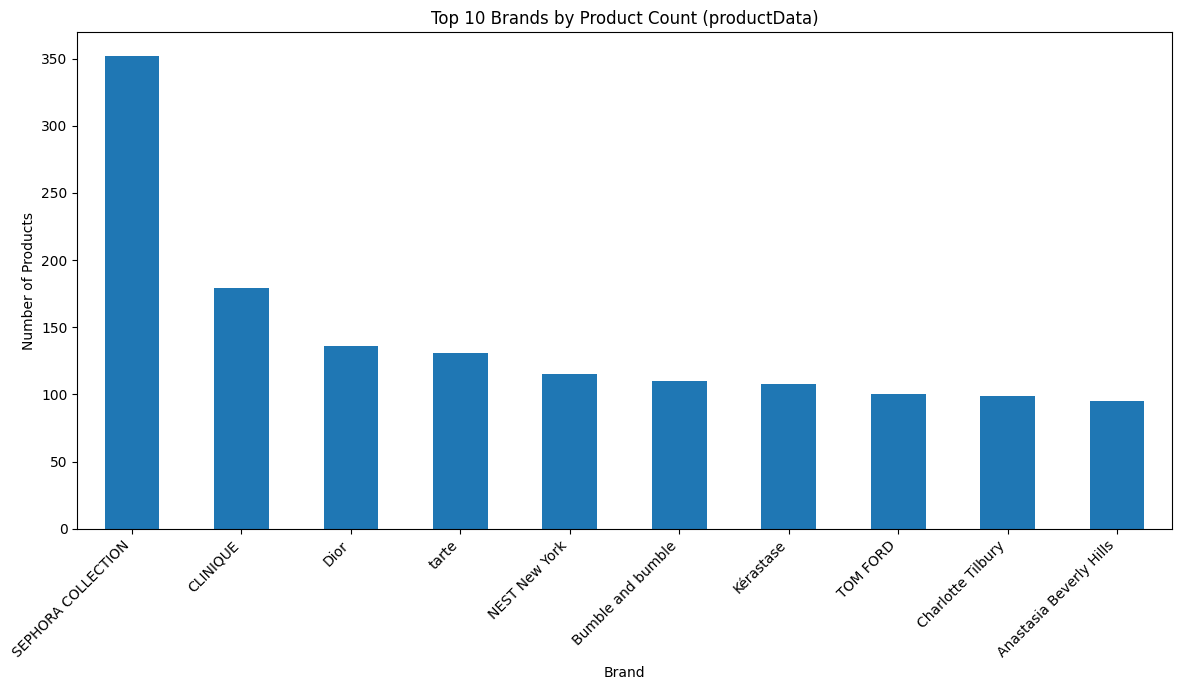

In [ ]:
# Load and inspect data
topProducts = pd.read_csv('/content/drive/MyDrive/AIML/most_used_beauty_cosmetics_products_extended.csv')
skinIssues = pd.read_csv('/content/drive/MyDrive/AIML/skinIssue.csv')
productData = pd.read_csv('/content/drive/MyDrive/AIML/productData.csv')
userData = pd.read_csv('/content/drive/MyDrive/AIML/userData.csv')
ingredientData = pd.read_csv('/content/drive/MyDrive/AIML/ingredientData.csv')

print("--- topProducts Data ---")
display(topProducts.head())
topProducts.info()

print("\n--- skinIssues Data ---")
display(skinIssues.head())
skinIssues.info()

print("\n--- productData Data ---")
display(productData.head())
productData.info()

print("\n--- userData Data ---")
display(userData.head())
userData.info()

print("\n--- ingredientData Data ---")
display(ingredientData.head())
ingredientData.info()

# --- Data Visualization ---

# Distribution of Ratings in topProducts
plt.figure(figsize=(10, 6))
sns.histplot(topProducts['Rating'], bins=20, kde=True)
plt.title('Distribution of Product Ratings (topProducts)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Count of Products by Category in topProducts (Top 10)
plt.figure(figsize=(12, 7))
topProducts['Category'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Product Categories (topProducts)')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of Skin Types in skinIssues
plt.figure(figsize=(10, 6))
skinIssues['Skin type'].value_counts().plot(kind='bar')
plt.title('Distribution of Skin Types (skinIssues)')
plt.xlabel('Skin Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of Concerns in skinIssues (Top 10)
plt.figure(figsize=(12, 7))
# Need to split concerns that are comma-separated
all_concerns = skinIssues['Concern'].str.split(',').explode().str.strip()
all_concerns.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Skin Concerns (skinIssues)')
plt.xlabel('Concern')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of Brands by Product Count in productData (Top 10)
plt.figure(figsize=(12, 7))
productData['brand_name'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Brands by Product Count (productData)')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()